In [1]:

import pandas as pd 
import wandb
import collections
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") # seaborn
import scienceplots
sns.set(font_scale=1.5, rc={'text.usetex' : True})
plt.style.use('ieee')

tag_to_val = [("Noise", "sigma"), ("Blur", "sigma"), ("JPEG", "q"), ("Contrast", "factor"), ("Rescale", "factor"), ("Grid", "factor")]
timmname2print = {
        'vit_large_patch16_224': 'ViT Large',
        'vit_base_patch16_224': 'ViT Base',
        'vit_small_patch16_224': 'ViT Small',
        'vit_tiny_patch16_224': 'ViT Tiny',
        'tf_efficientnet_b0': 'EfficientNet-B0',
        'tf_efficientnet_b1': 'EfficientNet-B1',
        'tf_efficientnet_b2': 'EfficientNet-B2',
        'tf_efficientnet_b3': 'EfficientNet-B3',
        'tf_efficientnet_b4': 'EfficientNet-B4',
        'tf_efficientnet_b5': 'EfficientNet-B5',
        'tf_efficientnet_b6': 'EfficientNet-B6',
        'tf_efficientnet_b7': 'EfficientNet-B7',
        'swin_tiny_patch4_window7_224': 'Swin Tiny',
        'swin_small_patch4_window7_224': 'Swin Small',
        'swin_base_patch4_window7_224': 'Swin Base',
        'swin_large_patch4_window7_224': 'Swin Large',
        'convnext_atto': 'ConvNeXt Atto',
        'convnext_base': 'ConvNeXt Base',
        'convnext_femto': 'ConvNeXt Femto',
        'convnext_large': 'ConvNeXt Large',
        'convnext_nano': 'ConvNeXt Nano',
        'convnext_pico': 'ConvNeXt Pico',
        'convnext_small': 'ConvNeXt Small',
        'convnext_tiny': 'ConvNeXt Tiny',
        'convnext_xlarge': 'ConvNeXt XLarge',
        'mobilenetv3_small_050': 'MobileNetV3 Small 0.50',
        'mobilenetv3_small_075': 'MobileNetV3 Small 0.75',
        'mobilenetv3_small_100': 'MobileNetV3 Small 1.00', 
                  }

/tmp/ipykernel_3962393/1876556809.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
api = wandb.Api()

data = collections.defaultdict(list)
for t_v in tag_to_val:
    idx = 0
    runs = api.runs("petr_petr/adversarial", {"$and": [{"group": "advgen_baseline2", "tags": t_v[0], "state": "finished"}]})
    print(len(runs))

    for run in runs: 
        # .summary contains the output keys/values for metrics like accuracy.
        #  We call ._json_dict to omit large files 
        summary = run.summary

        data["error"].append(summary["eval_error_top1_adv_epoch"])
        data["params"].append(summary["params"])
        data["model_name"].append(summary["model_name"])
        data["base_arch"].append(summary["base_architecture"])
        data["input_size"].append(summary["input_size"])
        data["factor"].append(summary[t_v[1]])
        data["distortion"].append(t_v[0])

runs_df = pd.DataFrame(data)
runs_df.to_csv(f"experiment.csv")


484
efficientnet_b2
efficientnet_b4
efficientnet_b4
efficientnet_b4
efficientnet_b4
efficientnet_b4
efficientnet_b4
efficientnet_b4
efficientnet_b4
efficientnet_b4
efficientnet_b4
efficientnet_b4
efficientnet_b3
efficientnet_b3
efficientnet_b3
efficientnet_b3
efficientnet_b3
efficientnet_b3
efficientnet_b3
efficientnet_b3
efficientnet_b3
efficientnet_b3
efficientnet_b3
efficientnet_b2
efficientnet_b2
efficientnet_b2
efficientnet_b2
efficientnet_b2
efficientnet_b2
efficientnet_b2
efficientnet_b2
efficientnet_b2
efficientnet_b2
efficientnet_b1
efficientnet_b1
efficientnet_b1
efficientnet_b1
efficientnet_b1
efficientnet_b1
efficientnet_b1
efficientnet_b1
efficientnet_b1
efficientnet_b1
efficientnet_b1
efficientnet_b0
efficientnet_b0
efficientnet_b0
efficientnet_b0
efficientnet_b0
efficientnet_b0
efficientnet_b0
efficientnet_b0
efficientnet_b0
efficientnet_b0
efficientnet_b0
efficientnet_b4
efficientnet_b4
efficientnet_b4
efficientnet_b4
efficientnet_b4
efficientnet_b4
efficientnet_b4
effi

In [3]:
df = pd.read_csv('../experiment.csv', index_col=0)
# print(df.isnull().values.any())
df = df.drop(df[df['model_name'].str.startswith('efficientnet')].index, axis='rows') # remove timm pretrained effnet
df = df.drop(df[(df['distortion'] == 'Contrast') & (df['factor'] == 0.0)].index, axis='rows') # remove tensorflow pretrained effnet
df = df.drop(df[(df['distortion'] == 'Rescale') & (df['factor'] == 0.01)].index, axis='rows') # remove tensorflow pretrained effnet
for k, v in timmname2print.items():
    df = df.replace(k, v)
# print(df[df['model_name'] == 'efficientnet_b4']['distortion'])
# print(df.isnull().values.any())
print(df['distortion'].unique())
print(df)

['Noise' 'Blur' 'JPEG' 'Contrast' 'Rescale' 'Grid']
         error    params              model_name    base_arch  input_size  \
55    0.980187   2542856  MobileNetV3 Small 1.00  mobilenetv3         224   
56    0.966072   2542856  MobileNetV3 Small 1.00  mobilenetv3         224   
57    0.943319   2542856  MobileNetV3 Small 1.00  mobilenetv3         224   
58    0.915794   2542856  MobileNetV3 Small 1.00  mobilenetv3         224   
59    0.882027   2542856  MobileNetV3 Small 1.00  mobilenetv3         224   
...        ...       ...                     ...          ...         ...   
2813  0.717139  11708744               resnet18d       resnet         288   
2814  0.383960  11708744               resnet18d       resnet         288   
2815  0.405988  11708744               resnet18d       resnet         288   
2816  0.831629  11708744               resnet18d       resnet         288   
2817  0.977650  11708744               resnet18d       resnet         288   

      factor distortion

In [5]:
df['error_min'] = df.groupby('model_name')['error'].transform('min')
df['error_max'] = df.groupby('model_name')['error'].transform('max')
df['error_relative'] = df['error'] - df['error_min']
df['error_relative_max'] = df['error_max'] - df['error_min']
df['error_relative_max_perc'] = (df['error_max'] / df['error_min'] * 100).astype(int)
fig, axis = plt.subplots(7,1,figsize=(20, 3*6))
for i, ((gname, group), ax) in enumerate(zip(df.groupby('distortion'), axis)):
    group = group.sort_values(by=['base_arch', 'params'])
    # for ax, val in zip(axis, ['error_relative_max', 'error_relative_max_perc', 'error']):
    # for ax, val in zip(axis, [['base_arch', 'params']]):
    # sns.violinplot(ax=axis, data=group, x='model_name', y='error', hue='base_arch', inner='point')
    # sns.barplot(ax=ax, data=group, x='model_name', y='error', hue='base_arch', alpha=0.3, errorbar=('pi'), legend=False, err_kws={"color": ".5", "linewidth": 0.7}, capsize=.4)
    # sns.barplot(ax=ax, data=group, x='model_name', y='error_min', hue='base_arch', alpha=0.3, legend=False)
    sns.boxplot(ax=ax, data=group, x='model_name', y='error', hue='base_arch', legend=False)
    # sns.stripplot(ax=ax, data=group, x='model_name', y='error', legend=False, hue='factor', alpha=0.7, jitter=False)
    # sns.barplot(ax=ax, data=group, x='model_name', y='error_max', hue='base_arch', alpha=0.3)
    ax.set_title(gname)
    ax.set_ylabel("Error")
    # ax.set_yticklabels([0,0.5,1.0])
    ax.set_yticks([0,0.5,1.0])
    if i < len(axis)-1:
        ax.set_xticklabels([])
        ax.set_xlabel("")
    else:
        ax.set_xlabel("Model Name")
        ax.tick_params(axis='x', rotation=90)
    ax.set_ylim(0,1)
# plt.ylim(0,1)

df = df.sort_values(by=['base_arch', 'params'])
sns.barplot(ax=axis[-1], data=df, x='model_name', y='params', hue='base_arch', legend=False)
axis[-1].set_ylabel('# Parameters')
axis[-1].set_yscale("log")
axis[-1].set_xlabel("Model Name")
axis[-1].tick_params(axis='x', rotation=90)
axis[-1].grid(True, which='both', axis='y')
axis[-1].grid(True, which='major', color='gray', axis='y')
plt.show()

# for gname, group in df.groupby('base_arch'):
#     group = group.sort_values(by=['base_arch', 'params'])
#     fig, axis = plt.subplots(figsize=(24, 3))
#     # for ax, val in zip(axis, ['error_relative_max', 'error_relative_max_perc', 'error']):
#     # for ax, val in zip(axis, [['base_arch', 'params']]):
#     axis.set_title(gname)
#     axis.tick_params(axis='x', rotation=90)
#     # sns.violinplot(ax=axis, data=group, x='model_name', y='error', hue='base_arch', inner='point')
#     sns.barplot(ax=axis, data=group, x='distortion', y='error', hue='distortion', alpha=0.3, errorbar=('pi'), legend=True, err_kws={"color": ".5", "linewidth": 0.7}, capsize=.4)
#     sns.barplot(ax=axis, data=group, x='distortion', y='error_min', hue='distortion', alpha=0.3, legend=False)
#     sns.stripplot(ax=axis, data=group, x='distortion', y='error')
#     # sns.barplot(ax=ax, data=group, x='model_name', y='error_max', hue='base_arch', alpha=0.3)
#     fig.show()
#     plt.show()

RuntimeError: latex was not able to process the following string:
b'# Parameters'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmp0z__w2mv 283e9672230d17a95269ae210409f2e8.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./283e9672230d17a95269ae210409f2e8.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/mathptmx.sty)
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 283e9672230d17a95269ae210409f2e8.aux.
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/ot1ptm.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! You can't use `macro parameter character #' in vertical mode.
l.31 {\rmfamily #
                  Parameters}%
No pages of output.
Transcript written on tmp0z__w2mv/283e9672230d17a95269ae210409f2e8.log.




<Figure size 12000x10800 with 7 Axes>

In [ ]:
df.columns

Index(['error', 'params', 'model_name', 'base_arch', 'input_size', 'factor',
       'distortion', 'error_min', 'error_max', 'error_relative'],
      dtype='object')

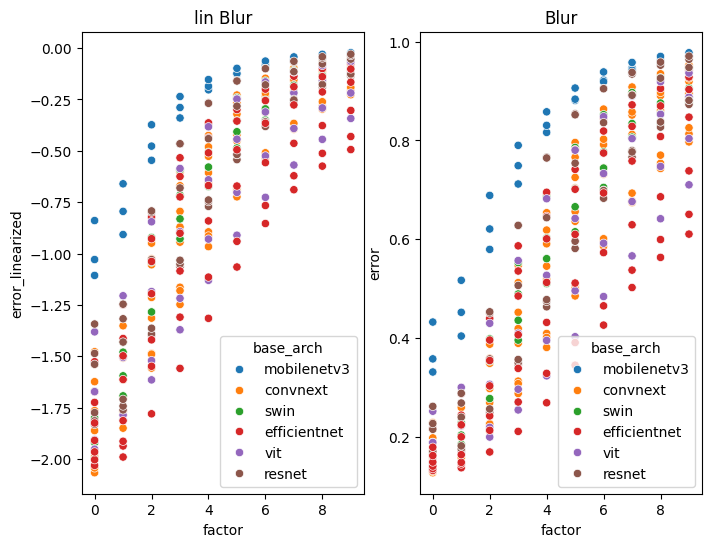

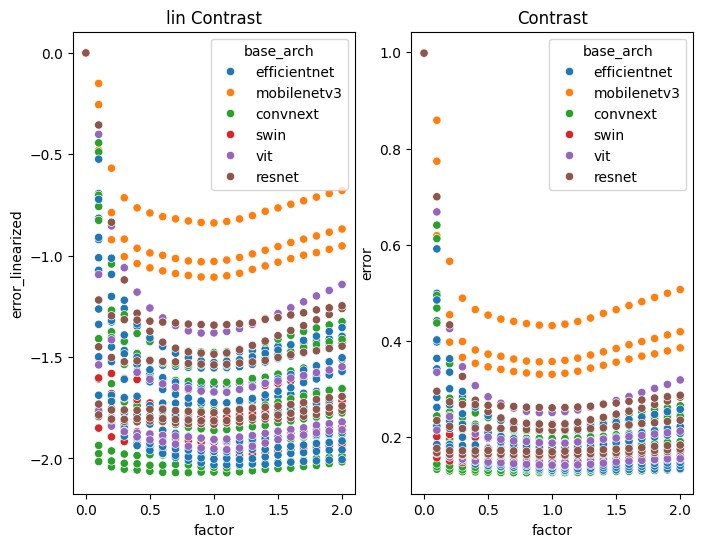

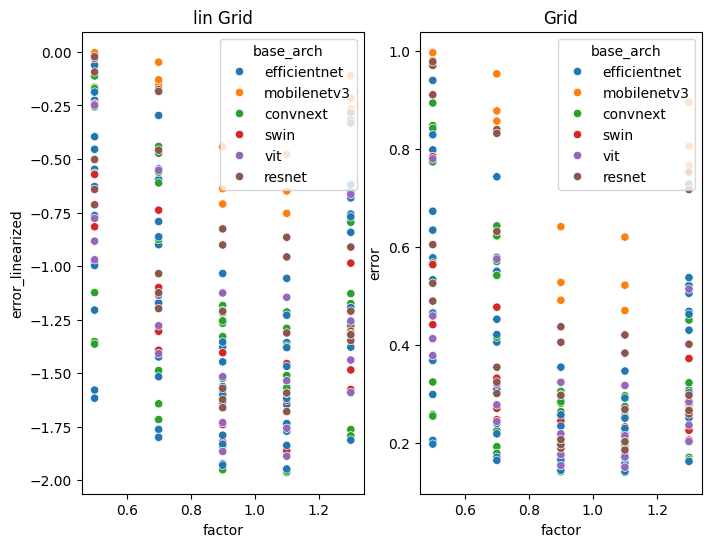

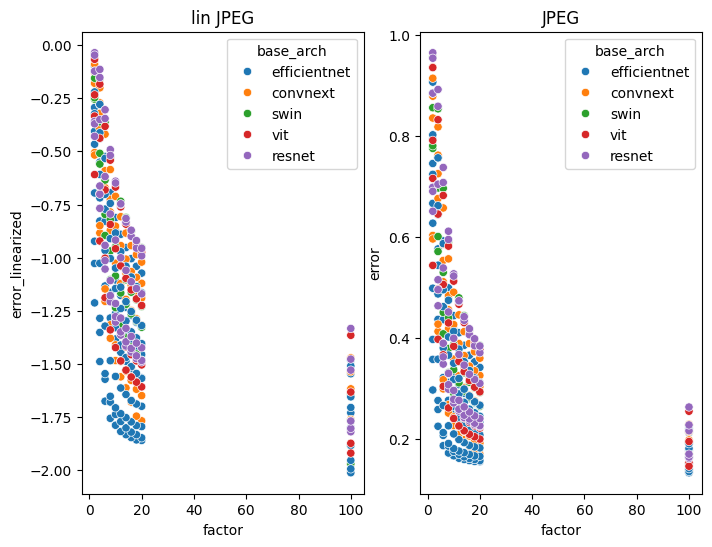

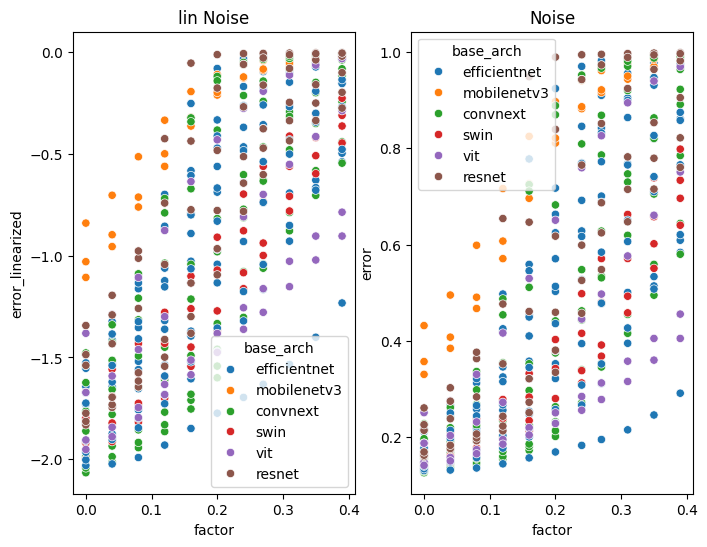

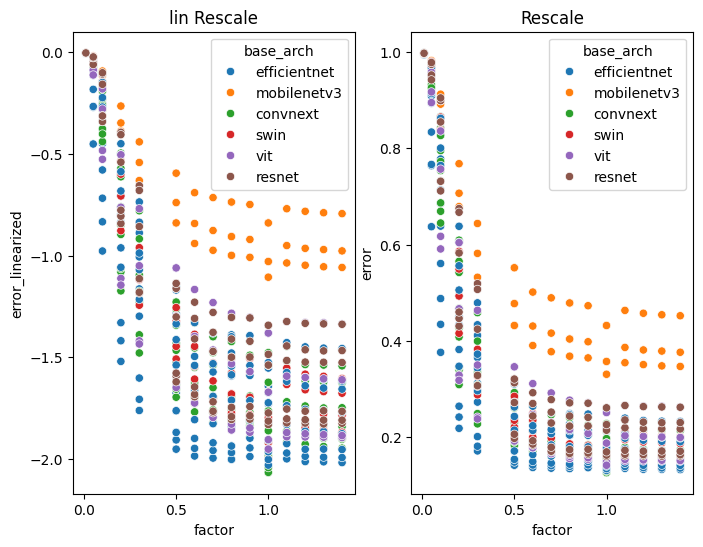

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
df['error_linearized'] = np.log(df['error'])
for gname, group in df.groupby('distortion'):
    fig, ax = plt.subplots(1,2,figsize=(8,6))
    ax[0].set_title(f"lin {gname}")
    sns.scatterplot(ax=ax[0], data=group, x='factor', y='error_linearized', hue='base_arch')
    ax[1].set_title(gname)
    sns.scatterplot(ax=ax[1], data=group, x='factor', y='error', hue='base_arch')
    fig.show()
    